## Ánalisis of Dry Bean Dataset

Import all the libraries and load the dataset from Kaggle, the first 5 rows and the stucture of the features are displayed.

In [7]:
import kagglehub
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 Features

In [8]:
path = kagglehub.dataset_download("muratkokludataset/dry-bean-dataset")
archivos = glob.glob(os.path.join(path, "**", "*.xlsx"), recursive=True)

archivo_datos = archivos[0]
df = pd.read_excel(archivo_datos)

display(df.head()) 

df.info() 

duplicate_count = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Based on the output:
- The dataset contains 17 columns, 16 of these are numerical (float64 and int64) and represent the geometric properties of the beans.
- There are no-null entries, so there are zero missing values, no missing value treatments or imputation techniques are necessary for preprocessing.
- 68 duplicated rows in the dataset have been identified. We will remove them in the preprocessing step

### 2.2 Target Variable and Class Distribution

Class proportions , Area and Perimeter Distribution by Bean Variety

C:\Users\js834\AppData\Local\Temp\ipykernel_13696\1524692962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Class',


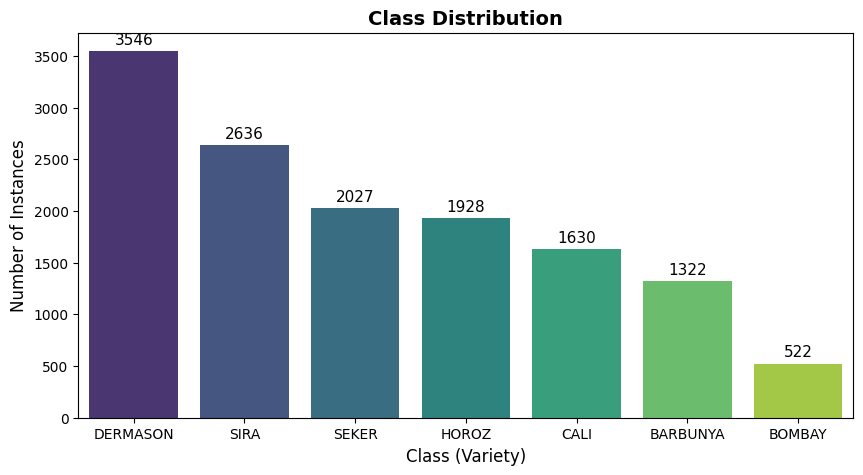

In [9]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Class', 
                   order=df['Class'].value_counts().index, 
                   palette='viridis')
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class (Variety)', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

The dataset is totally unbalanced.
For example, the DERMASON class is the most frequent, making up a significant portion of the data with 3,546 instances while the BOMBAY class is heavily underrepresented, containing only 522 instances.

### 2.3 Class Distribution Analysis

C:\Users\js834\AppData\Local\Temp\ipykernel_13696\2276375426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Class', y='Area',


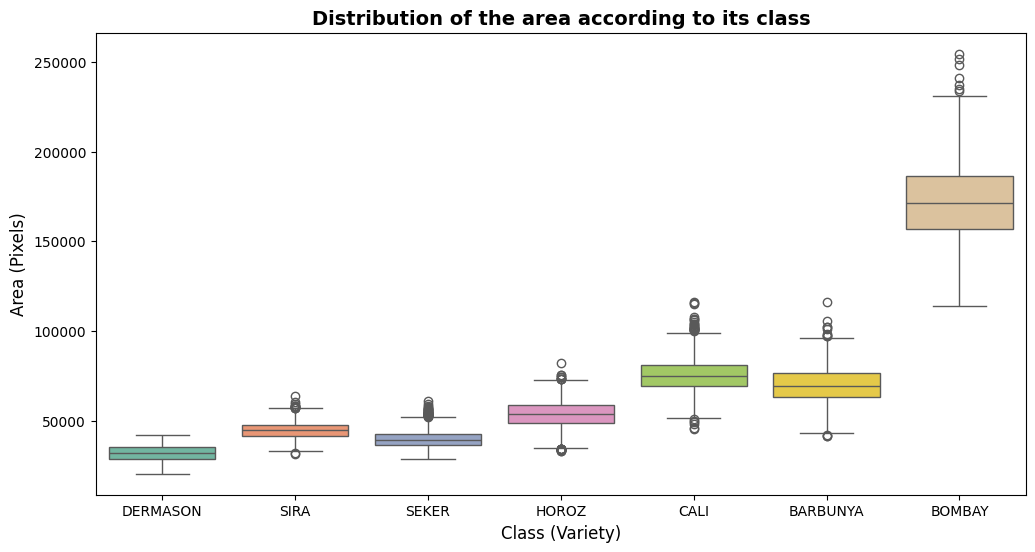

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Class', y='Area', 
            order=df['Class'].value_counts().index, 
            palette='Set2')
plt.title('Distribution of the area according to its class', fontsize=14, fontweight='bold')
plt.xlabel('Class (Variety)', fontsize=12)
plt.ylabel('Area (Pixels)', fontsize=12)
plt.show()

C:\Users\js834\AppData\Local\Temp\ipykernel_13696\2046354694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Class', y='Perimeter',


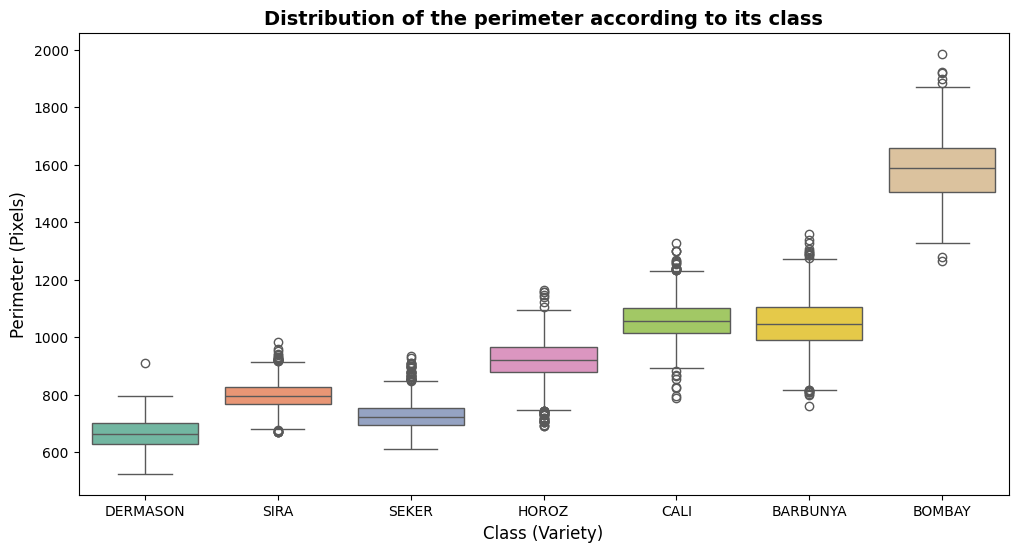

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Class', y='Perimeter', 
            order=df['Class'].value_counts().index, 
            palette='Set2')
plt.title('Distribution of the perimeter according to its class', fontsize=14, fontweight='bold')
plt.xlabel('Class (Variety)', fontsize=12)
plt.ylabel('Perimeter (Pixels)', fontsize=12)
plt.show()

As observed in our visualizations, features such as Area and Perimeter vary significantly depending on the bean Class.

### 2.4 Feature Multicollinearity

As it is explained in the documentation, there is a high degree of multicollinearity in the dataset as some values are the result of similar formulas or formulas that use other features. Plotting a heatmap of the correlations among features must visualize this idea: 

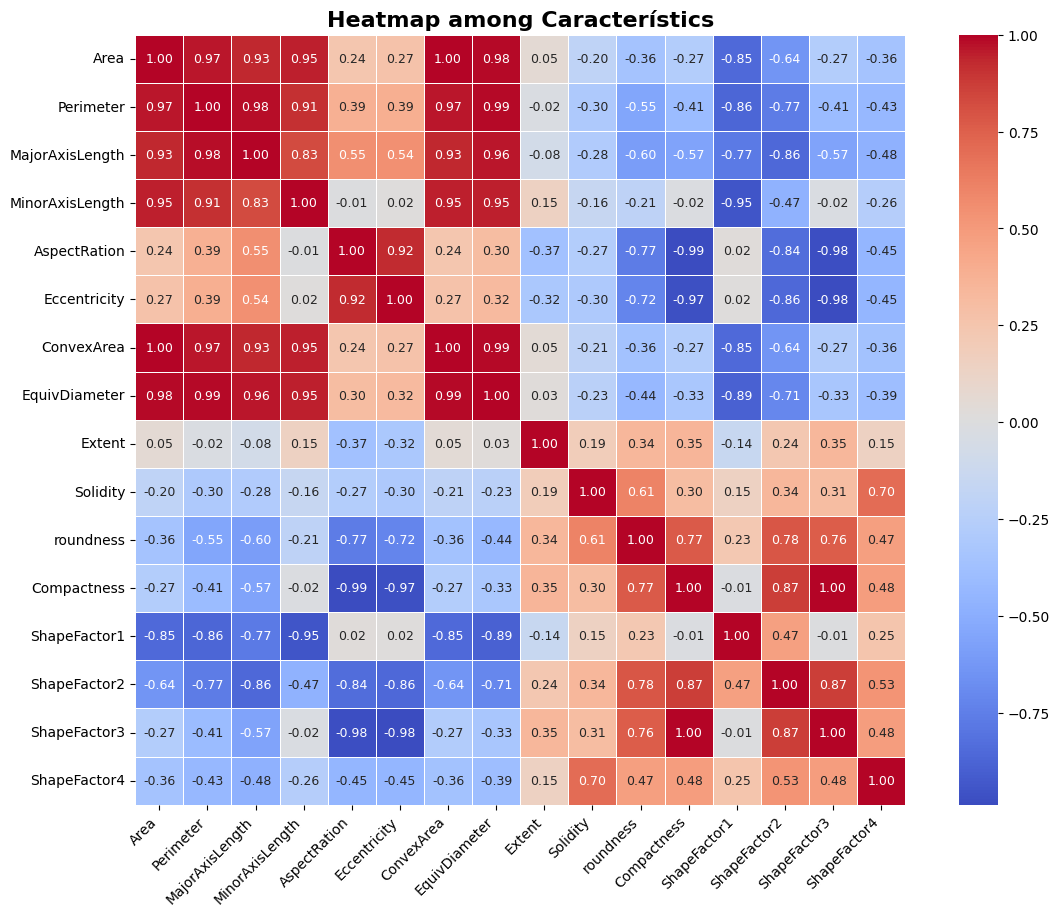

In [12]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar=True, square=True, linewidths=0.5, annot_kws={"size": 9})
plt.title('Heatmap among Característics', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

To understand the relationships between our numerical features, we generated a correlation heatmap. This visualization reveals several critical insights that will impact our modeling strategy:
- There are perfect or near-perfect positive correlations (0.95 to 1.00) among the size-related variables. Specifically, Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, and EquivDiameter are all highly redundant.
- We can also observe a very strong negative correlation between AspectRatio and Compactness ($-0.99$), meaning as the bean gets more elongated, it becomes less compact. Which is logical.